In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
import pandas as pd

In [2]:
flujos = pd.read_csv(os.path.join("tfm_ml/flujos-total-20000.csv"))
flujos.info()
flujos.head()
flujos = flujos.drop(['#:unix_secs','unix_nsecs','exaddr', 'engine_type', 'engine_id','src_mask', 'dst_mask', 'src_as', 'dst_as','sysuptime','first', 'last', 'srcaddr', 'dstaddr', 'nexthop', 'dpkts', 'prot', 'tos','tcp_flags','input','output'],axis=1)
flujos.info()
flujos.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #:unix_secs  19998 non-null  int64 
 1   unix_nsecs   19998 non-null  int64 
 2   sysuptime    19998 non-null  int64 
 3   exaddr       19998 non-null  object
 4   dpkts        19998 non-null  int64 
 5   doctets      19998 non-null  int64 
 6   first        19998 non-null  int64 
 7   last         19998 non-null  int64 
 8   engine_type  19998 non-null  int64 
 9   engine_id    19998 non-null  int64 
 10  srcaddr      19998 non-null  object
 11  dstaddr      19998 non-null  object
 12  nexthop      19998 non-null  object
 13  input        19998 non-null  int64 
 14  output       19998 non-null  int64 
 15  srcport      19998 non-null  int64 
 16  dstport      19998 non-null  int64 
 17  prot         19998 non-null  int64 
 18  tos          19998 non-null  int64 
 19  tcp_flags    19998 non-nu

,doctets,srcport,dstport,label
0,60,587,51930,1
1,60,587,35794,1
2,60,587,51934,1
3,176,0,1281,1
4,60,587,35782,1


In [3]:
for col in flujos.columns:
    if flujos[col].min() == flujos[col].max():
        flujos = flujos.drop(col, axis=1)

In [4]:
flujos.info()
flujos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   doctets  19998 non-null  int64
 1   srcport  19998 non-null  int64
 2   dstport  19998 non-null  int64
 3   label    19998 non-null  int64
dtypes: int64(4)
memory usage: 625.1 KB


,doctets,srcport,dstport,label
0,60,587,51930,1
1,60,587,35794,1
2,60,587,51934,1
3,176,0,1281,1
4,60,587,35782,1


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Creamos una copia de las columnas sin la columna 'label'
features = flujos.drop('label', axis=1)

In [6]:
# Creamos el escalador
scaler = MinMaxScaler()

In [7]:
# Ajustamos el escalador a nuestras características y luego transformamos los datos
scaled_features = scaler.fit_transform(features)


# Volvemos a convertir en un DataFrame
scaled_flujos = pd.DataFrame(scaled_features, columns=features.columns)

# Agregamos la columna 'label' al DataFrame escalado
scaled_flujos['label'] = flujos['label'].values


scaled_flujos.info()
scaled_flujos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   doctets  19998 non-null  float64
 1   srcport  19998 non-null  float64
 2   dstport  19998 non-null  float64
 3   label    19998 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 625.1 KB


,doctets,srcport,dstport,label
0,0.000002,0.009624,0.851238,1
1,0.000002,0.009624,0.586466,1
2,0.000002,0.009624,0.851304,1
3,0.000014,0.000000,0.020150,1
4,0.000002,0.009624,0.586269,1


In [8]:
#Caso inicial
#Se van a utilizar los flujos y la reducción propuesta por el paper.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Seleccionamos las características y las etiquetas
X = scaled_flujos.drop('label', axis=1)
y = scaled_flujos['label']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definimos una lista con los modelos que queremos probar
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('MLP', MLPClassifier(max_iter=30000))
]

# Entrenamos el modelo y lo evaluamos
for name, model in models:
    model.fit(X_train, y_train)  # Entrenamos el modelo
    predictions = model.predict(X_test)  # Realizamos predicciones en el conjunto de prueba
    accuracy = accuracy_score(y_test, predictions)  # Calculamos la precisión
    print(f'{name} Accuracy: {accuracy * 100:.2f}%') #imprimos por pantalla los resultados de precision

Decision Tree Accuracy: 100.00%
Random Forest Accuracy: 100.00%
SVM Accuracy: 70.98%
KNN Accuracy: 99.72%
MLP Accuracy: 99.82%


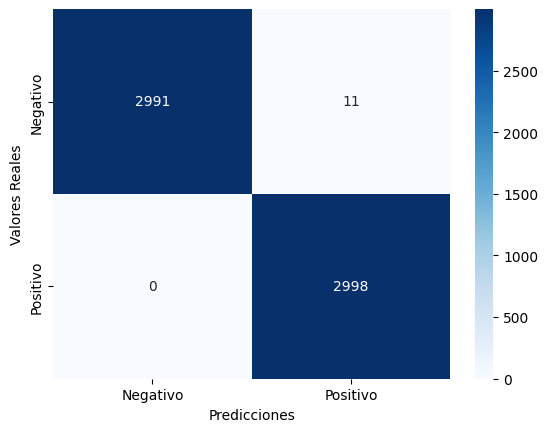

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, predictions)
# Mostrar la matriz de confusión como un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [10]:
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions))


0.9963443004320373


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3002
           1       1.00      1.00      1.00      2998

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [12]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions)
print(f'Recall: {recall}')

Recall: 1.0


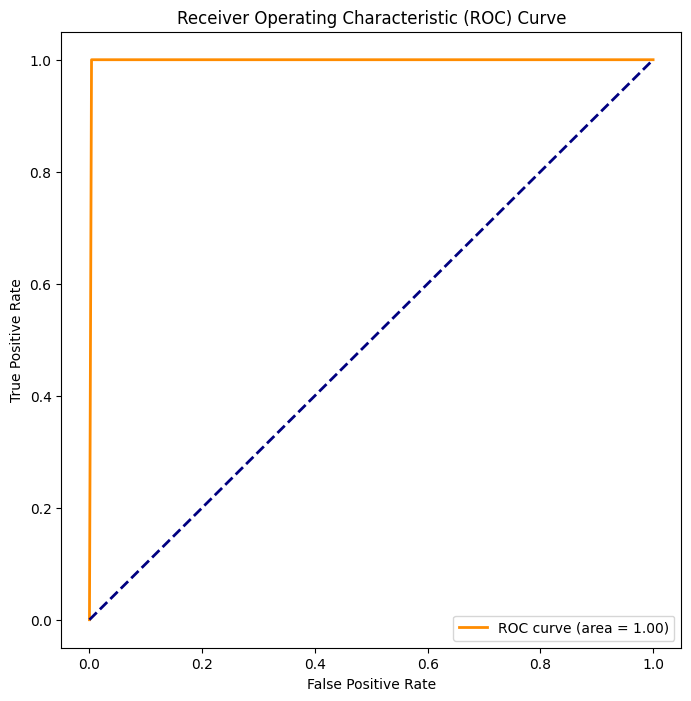

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [20]:
flujos2 = pd.read_csv(os.path.join("tfm_ml/netflow_flowa588.csv"))
flujos2.info()
flujos2.head()
flujos2 = flujos2.drop(['#:unix_secs','unix_nsecs','exaddr', 'engine_type', 'engine_id','src_mask', 'dst_mask', 'src_as', 'dst_as','sysuptime','first', 'last', 'srcaddr', 'dstaddr', 'nexthop', 'dpkts', 'prot', 'tos','tcp_flags','input','output'],axis=1)
flujos2.info()
flujos2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #:unix_secs  1587 non-null   int64 
 1   unix_nsecs   1587 non-null   int64 
 2   sysuptime    1587 non-null   int64 
 3   exaddr       1587 non-null   object
 4   dpkts        1587 non-null   int64 
 5   doctets      1587 non-null   int64 
 6   first        1587 non-null   int64 
 7   last         1587 non-null   int64 
 8   engine_type  1587 non-null   int64 
 9   engine_id    1587 non-null   int64 
 10  srcaddr      1587 non-null   object
 11  dstaddr      1587 non-null   object
 12  nexthop      1587 non-null   object
 13  input        1587 non-null   int64 
 14  output       1587 non-null   int64 
 15  srcport      1587 non-null   int64 
 16  dstport      1587 non-null   int64 
 17  prot         1587 non-null   int64 
 18  tos          1587 non-null   int64 
 19  tcp_flags    1587 non-null 

,doctets,srcport,dstport,label
0,60,47118,22,1
1,88,0,1281,1
2,176,0,1281,1
3,60,25,43088,1
4,60,25,59028,1


In [22]:
# Creamos una copia de las columnas sin la columna 'label'
features2 = flujos2.drop('label', axis=1)
# Creamos el escalador
scaler = MinMaxScaler()
# Ajustamos el escalador a nuestras características y luego transformamos los datos
scaled_features2 = scaler.fit_transform(features2)


# Volvemos a convertir en un DataFrame
scaled_flujos2 = pd.DataFrame(scaled_features2, columns=features2.columns)

# Agregamos la columna 'label' al DataFrame escalado
scaled_flujos2['label'] = flujos2['label'].values


scaled_flujos2.info()
scaled_flujos2.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   doctets  1587 non-null   float64
 1   srcport  1587 non-null   float64
 2   dstport  1587 non-null   float64
 3   label    1587 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 49.7 KB


,doctets,srcport,dstport,label
0,0.000000,0.772958,0.000000,1
1,0.000014,0.000000,0.020661,1
2,0.000057,0.000000,0.020661,1
3,0.000000,0.000410,0.706741,1
4,0.000000,0.000410,0.968327,1


In [26]:
X_prueba = scaled_flujos2.drop('label', axis=1)
for name, model in models:
    predictions = model.predict(X_prueba)  # Realizamos predicciones en el conjunto de prueba
    accuracy = accuracy_score(y_test, predictions)  # Calculamos la precisión
    print(f'{name} Accuracy: {accuracy * 100:.2f}%') #imprimos por pantalla los resultados de precision

ValueError: Found input variables with inconsistent numbers of samples: [6000, 1587]